In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [140]:
df = pd.read_csv('Iris.csv')

In [141]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


###Checking data properties and Data cleaning or preprocessing

In [142]:
df.drop(columns=['Id'],axis=0,inplace=True)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [143]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [144]:
df.shape
print('Rows: ',df.shape[0])
print('Columns: ',df.shape[1])

Rows:  150
Columns:  5


In [145]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##Data Visualization

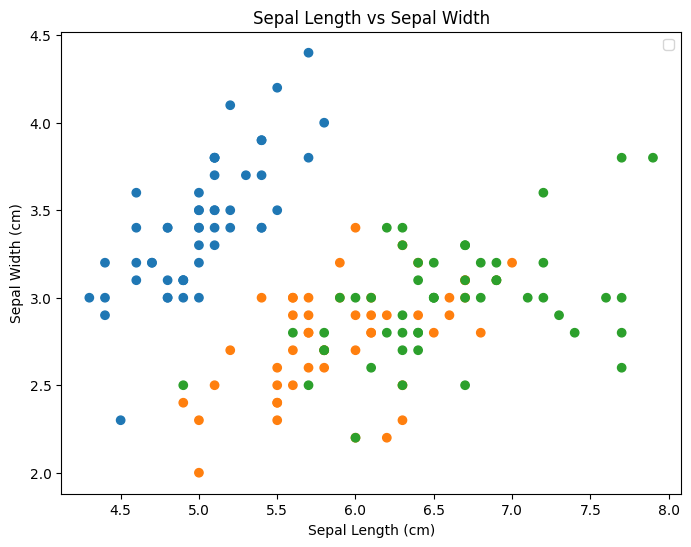

In [146]:
cmap = plt.cm.tab10
species_colors = [cmap(i) for i in range(len(df.Species.unique()))]
color_dict = dict(zip(df.Species.unique(), species_colors))
plt.figure(figsize=(8, 6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['Species'].map(color_dict))
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

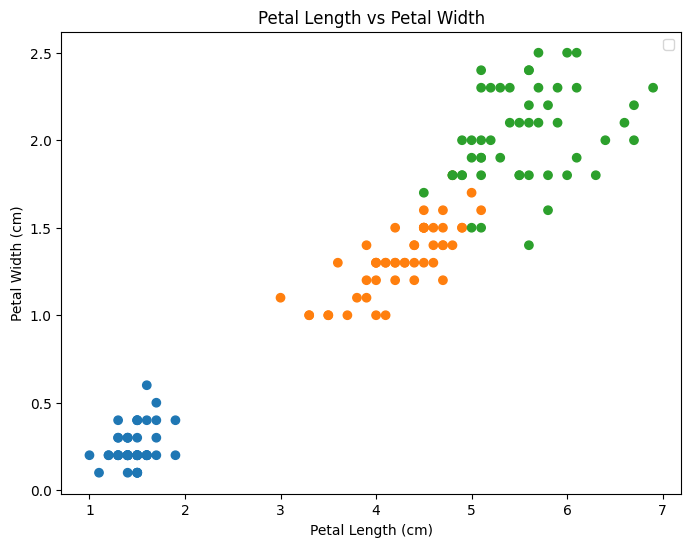

In [147]:
cmap = plt.cm.tab10
species_colors = [cmap(i) for i in range(len(df.Species.unique()))]
color_dict = dict(zip(df.Species.unique(), species_colors))
plt.figure(figsize=(8, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c=df['Species'].map(color_dict))
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.legend()
plt.show()

<Figure size 1800x600 with 0 Axes>

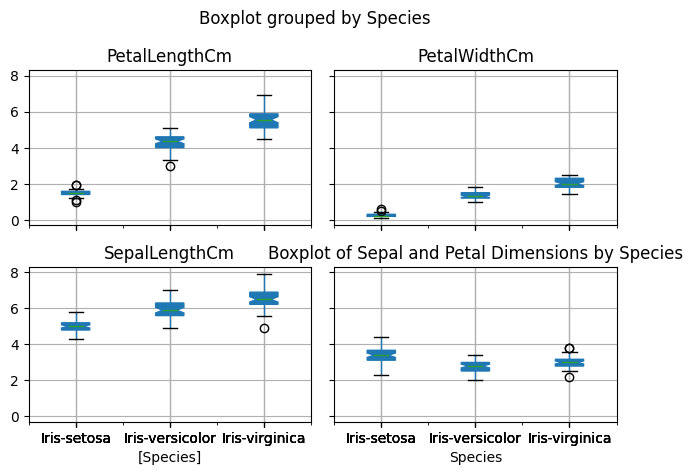

In [148]:
plt.figure(figsize=(18, 6))
df.boxplot(by='Species', notch=True, patch_artist=True)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm), Sepal Width (cm), Petal Length (cm), Petal Width (cm)')
plt.title('Boxplot of Sepal and Petal Dimensions by Species')
plt.grid(True)
plt.tight_layout()
plt.show()

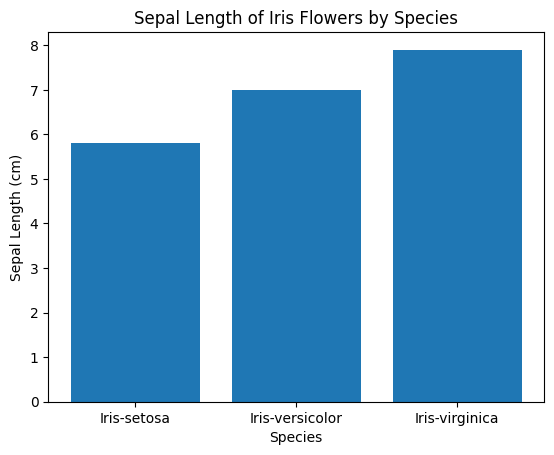

In [149]:
plt.bar(df["Species"], df["SepalLengthCm"])
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.title("Sepal Length of Iris Flowers by Species")
plt.show()

In [150]:
df_1=df.copy()

In [151]:
df_1.columns = ['sl','sw','pl','pw','species']

In [152]:
df_split_iris=df_1.species.str.split('-',n=-1,expand=True)
df_split_iris.drop(columns=0,axis=1,inplace=True)
df1=df_1.join(df_split_iris)
df1.rename({1:'species1'},axis=1,inplace=True)

<Axes: xlabel='species1', ylabel='sw'>

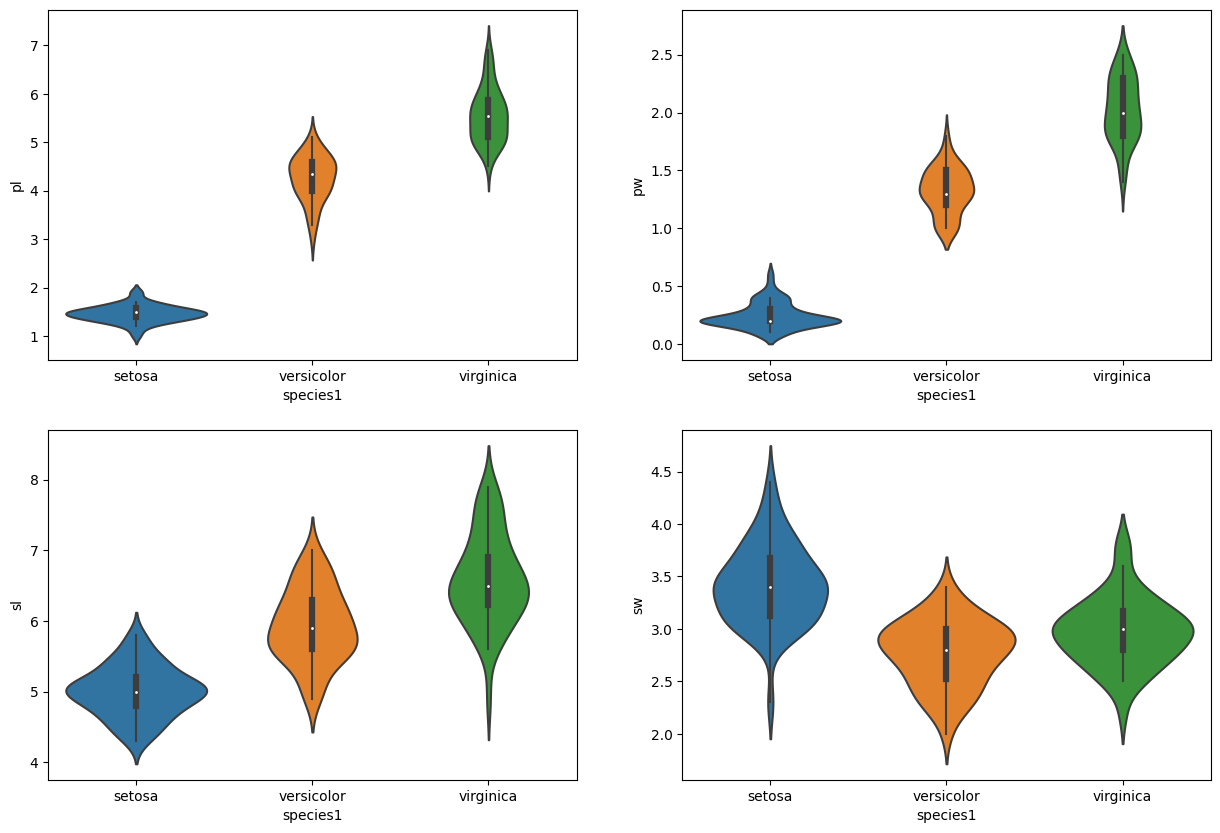

In [153]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species1',y='pl',data=df1)
plt.subplot(2,2,2)
sns.violinplot(x='species1',y='pw',data=df1)
plt.subplot(2,2,3)
sns.violinplot(x='species1',y='sl',data=df1)
plt.subplot(2,2,4)
sns.violinplot(x='species1',y='sw',data=df1)

#Machine Learning

##KNN

In [154]:
knn = KNeighborsClassifier(n_neighbors=5)

In [155]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [156]:
print('K-Nearest Neighbors (k=5)')
print('Classification Report')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

K-Nearest Neighbors (k=5)
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.95        38
      macro avg       0.95      0.95      0.95        38
   weighted avg       0.96      0.95      0.95        38

Confusion Matrix
[[13  0  0]
 [ 0 12  2]
 [ 0  0 11]]


##Random Forest

In [157]:
rf = RandomForestClassifier(n_estimators=100)

In [158]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [159]:
print('Random Forest (n_estimators=100)')
print('Classification Report')
print(classification_report(y_test, y_pred))
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Random Forest (n_estimators=100)
Classification Report
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.92        38
      macro avg       0.92      0.92      0.92        38
   weighted avg       0.92      0.92      0.92        38

Confusion Matrix
[[13  0  0]
 [ 0 13  1]
 [ 0  2  9]]
